In [229]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IIRFilter import IIRFilter
%matplotlib inline

In [288]:
def normalize(data,inmin=0,inmax=60,outmin=-1,outmax=1):
    for i in range(len(data)):
        data[i] =  (data[i] - inmin)*(outmax-outmin)/(inmax-inmin)+(outmin)
    return data

def ommit(data,ommit_value):
    data_list = []
    for d in data:
        if d != ommit_value:
            data_list.append(d)
    return data_list

def show_specgram(data,N=64,fs=37,overlap=16):
    fig = plt.figure()
    hamming = np.hamming(N)
    pxx, freqs, bins, im = specgram(data, NFFT=N, Fs=fs, noverlap=overlap, window=hamming,cmap='jet')
#     axis([0, length, 0, fs / 2])
    xlabel("time [second]")
    ylabel("frequency [Hz]")
#     fig.clear()

def getSpec(data,fft_window=512,base_window=64,hop_length=32):
    counter = 0
    window_func = np.hamming(base_window)
    input_vector = np.zeros(fft_window,dtype=np.float64)
    spec_buffer = []
    while counter + base_window < len(data):
        base = data[counter:counter+base_window] * window_func
        input_vector[fft_window/2-base_window/2 : fft_window/2 + base_window/2] = base
        X = np.fft.fft(input_vector)
        spectrum = [np.abs(c.real**2 + c.imag**2) for c in X]
        spec_buffer.append(20*np.log10(spectrum[:(int)(fft_window/2)]))
        counter += hop_length
    return (np.array(spec_buffer), np.fft.fftfreq(fft_window, d=1.0/37)[:(int)(fft_window/2)])


# def iir(data,fs,cFreq=3):
#     a = np.zeros(3)
#     b = np.zeros(3)
#     fc = np.tan(cFreq * np.pi / fs)/(2*np.pi)
#     denom = 1 + (2*np.sqrt(2) * np.pi * fc) + 4 * np.pi**2 * fc**2
#     b[0] = 1.0/denom
#     b[1] = -2.0 / denom
#     b[2]  = 1.0/denom
#     a[0] = 1.0
#     a[1] = (8*np.pi**2 *fc**2 * -2)/denom
#     a[2] = (1 - (2*np.sqrt(2) * np.pi * fc) + 4* np.pi**2 * fc**2)/denom
    
#     y = np.zeros(len(data))
#     Q = len(a)-1
#     P = len(b) -1
#     for n in range(len(data)):
#         for i in range(0,P+1):
#             if n - i >= 0:
#                 y[n] += b[i]*data[n-i]
#         for j in range(0,Q+1):
#             if n - j >= 0:
#                 y[n] -= a[j] * y[n-j]
#     return y

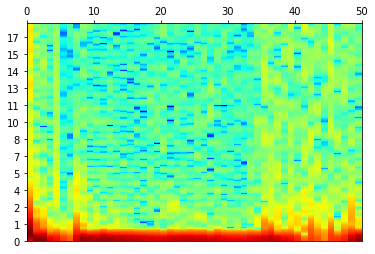

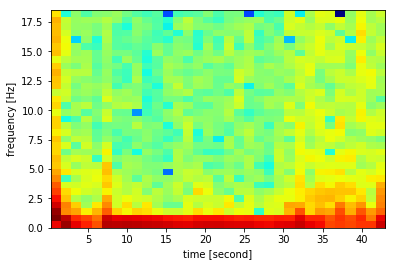

In [320]:
data = np.load('/Users/endy/WashBasin/PointCab/Cabed_Motion_COG/Dentifrice/cabed_all_COG.npy')
y = data.T[1]
x = data.T[0]
weight = data.T[2]
# print(x)
y = ommit(y,0)
x = ommit(x,0)
weight = ommit(weight,0)

iir = IIRFilter()
iir.hpf(3,37)

x = normalize(x)
y = normalize(y)
weight = normalize(weight,inmin=np.min(weight),inmax=np.max(weight))

# weight = iir.iir(weight)

(spec,freqlist) = getSpec(x)
# fig, ax = plt.subplots(figsize=(25, 20))
# sns.heatmap(spec.T, cmap='jet')
# # ax.set_yticklabels(freqlist)
# ax.xaxis.tick_top()
# plt.gca().invert_yaxis()


fig, ax = plt.subplots()
heatmap = ax.pcolor(spec.T, cmap=plt.cm.jet)

# ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
# ax.set_yticks(np.arange(freqlist.shape[0]) + 10, minor=False)
# plt.yticks()
freqlist = np.array(freqlist,dtype=np.int16)

ax.invert_yaxis()
ax.xaxis.tick_top()
plt.gca().invert_yaxis()
plt.yticks(np.arange(0,255,20), freqlist[np.arange(0,255,20)])

# ax.set_xticklabels(row_labels, minor=False)
# ax.set_yticklabels(column_labels, minor=False)
# plt.show()
# plt.savefig('image.png')

#         return heatmap


# sns.heatmap(spec.T, cmap='jet')
show_specgram(x)

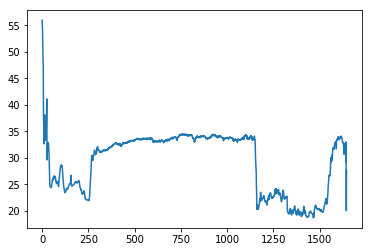